# **Predict the Next Character in a Word**

## **Import Libraries**

In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

## **Load the Dataset**

In [2]:
file_path = r"C:\Users\bbuser\Desktop\cleaned_merged_fairy_tales_without_eos.txt"

with open(file_path, encoding='utf-8') as f:
    text = f.read()

print("Total characters in text:", len(text))
print("Sample:\n", text[:500])

# (Optional) Use only a subset for faster testing
text = text[:200000]  # keep first 200k characters to avoid memory issues

Total characters in text: 20455694
Sample:
 The Happy Prince.
HIGH above the city, on a tall column, stood the statue of the Happy Prince.  He was gilded all over with thin leaves of fine gold, for eyes he had two bright sapphires, and a large red ruby glowed on his sword-hilt.
He was very much admired indeed.  “He is as beautiful as a weathercock,” remarked one of the Town Councillors who wished to gain a reputation for having artistic tastes; “only not quite so useful,” he added, fearing lest people should think him unpractical, which h


## **Encode Characters as Integers**

In [3]:
chars = sorted(list(set(text)))
char_to_idx = {c: i for i, c in enumerate(chars)}
idx_to_char = {i: c for i, c in enumerate(chars)}

vocab_size = len(chars)
print("Unique characters (vocab size):", vocab_size)

encoded = np.array([char_to_idx[c] for c in text])

Unique characters (vocab size): 80


## **Create Sequences (Input → Next Character)**

In [4]:
seq_length = 100  # characters per input sequence
step = 1          # sliding window step

X = []
y = []

for i in range(0, len(encoded) - seq_length, step):
    X.append(encoded[i:i + seq_length])
    y.append(encoded[i + seq_length])

X = np.array(X)
y = np.array(y)

print("Number of sequences:", X.shape[0])

Number of sequences: 199900


## **Split into Train / Validation**

In [5]:
X = X[:20000]
y = y[:20000]

In [6]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.1, random_state=42
)

print("Train samples:", X_train.shape[0], "Validation samples:", X_val.shape[0])

Train samples: 18000 Validation samples: 2000


## **Define RNN and LSTM Models (with Embedding)**

In [7]:
def build_model(rnn_type='SimpleRNN', seq_length=100, vocab_size=None):
    model = models.Sequential()
    model.add(layers.Embedding(input_dim=vocab_size, output_dim=64, input_length=seq_length))
    
    if rnn_type == 'SimpleRNN':
        model.add(layers.SimpleRNN(256))
    elif rnn_type == 'LSTM':
        model.add(layers.LSTM(256))
    
    model.add(layers.Dense(vocab_size, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

rnn_model = build_model('SimpleRNN', seq_length, vocab_size)
lstm_model = build_model('LSTM', seq_length, vocab_size)

print("\n=== Simple RNN Model ===")
rnn_model.summary()
print("\n=== LSTM Model ===")
lstm_model.summary()


=== Simple RNN Model ===


C:\Users\bbuser\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


=== LSTM Model ===


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## **Train Both Models**

In [8]:
EPOCHS = 5
BATCH_SIZE = 128

history_rnn = rnn_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE
)

history_lstm = lstm_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE
)

Epoch 1/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 62s 393ms/step - accuracy: 0.2354 - loss: 2.9477 - val_accuracy: 0.3110 - val_loss: 2.5476
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 81s 385ms/step - accuracy: 0.3436 - loss: 2.3893 - val_accuracy: 0.3555 - val_loss: 2.2227
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 80s 370ms/step - accuracy: 0.3939 - loss: 2.1504 - val_accuracy: 0.4045 - val_loss: 2.0594
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 82s 373ms/step - accuracy: 0.4230 - loss: 2.0174 - val_accuracy: 0.4250 - val_loss: 1.9730
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 83s 379ms/step - accuracy: 0.4433 - loss: 1.9224 - val_accuracy: 0.4380 - val_loss: 1.9248
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 55s 387ms/step - accuracy: 0.4627 - loss: 1.8364 - val_accuracy: 0.4635 - val_loss: 1.8542
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 52s 366ms/step - accuracy: 0.4839 - loss: 1.7539 - val_accuracy: 0.4580 - val_loss: 1.8229
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 52s 371ms/step - accuracy: 0.5039 - loss: 1

## **Visualize Accuracy**

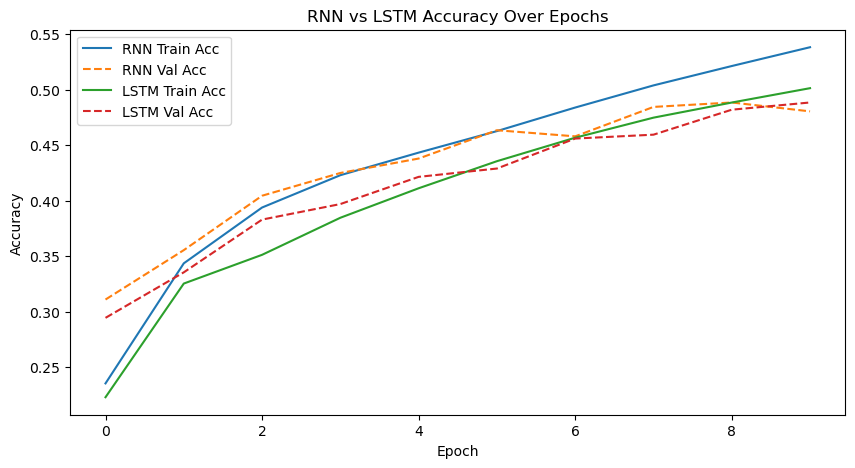

In [9]:
plt.figure(figsize=(10,5))
plt.plot(history_rnn.history['accuracy'], label='RNN Train Acc')
plt.plot(history_rnn.history['val_accuracy'], label='RNN Val Acc', linestyle='--')
plt.plot(history_lstm.history['accuracy'], label='LSTM Train Acc')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM Val Acc', linestyle='--')
plt.title('RNN vs LSTM Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## **Generate Text Function**

In [10]:
def sample_next_char(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds + 1e-8) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    return np.random.choice(range(len(preds)), p=preds)

def generate_text(model, seed_text, length=400, temperature=0.5):
    generated = seed_text
    for _ in range(length):
        input_seq = [char_to_idx[c] for c in generated[-seq_length:]]
        x = np.array([input_seq])
        preds = model.predict(x, verbose=0)[0]
        next_idx = sample_next_char(preds, temperature)
        next_char = idx_to_char[next_idx]
        generated += next_char
    return generated

## **Generate Text from Both Models**

In [11]:
seed = text[:seq_length]
print("\n=== Generated Text (RNN) ===")
print(generate_text(rnn_model, seed, length=300, temperature=0.7))

print("\n=== Generated Text (LSTM) ===")
print(generate_text(lstm_model, seed, length=300, temperature=0.7))


=== Generated Text (RNN) ===
The Happy Prince.
HIGH above the city, on a tall column, stood the statue of the Happy Prince.  He was so the secplere his lack me flest pomseling to the herper, and them aloms amare as to the berowe and and hanker ofte fay sander than she pomniny hing ho he fos hather of the dain.  “You have astolg, and hes swaype, the sead baith bet heailith of the gok il oon a ana.  “Wow hive stornot the Hithim

=== Generated Text (LSTM) ===
The Happy Prince.
HIGH above the city, on a tall column, stood the statue of the Happy Prince.  He will the Swallow,” said the Hith is of to the Swallow,” said of the Swallow look, “His is thear bad qore to the Happy at a grames longeu?”
“I lad not his a doungicht are berers blow, and he wis of the Pritcred ritsed a begmlle.  “An as not out me im the mount out the butt, and he dreast have gatle fr
